In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from scipy.stats.mstats import winsorize
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef,classification_report
import pickle


In [159]:
diabetics = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\ML\Datasets\diabetes.csv')

In [144]:
diabetics.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [145]:
diabetics.shape

(768, 9)

In [146]:
diabetics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [147]:
diabetics.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [148]:
diabetics.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [149]:
diabetics.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

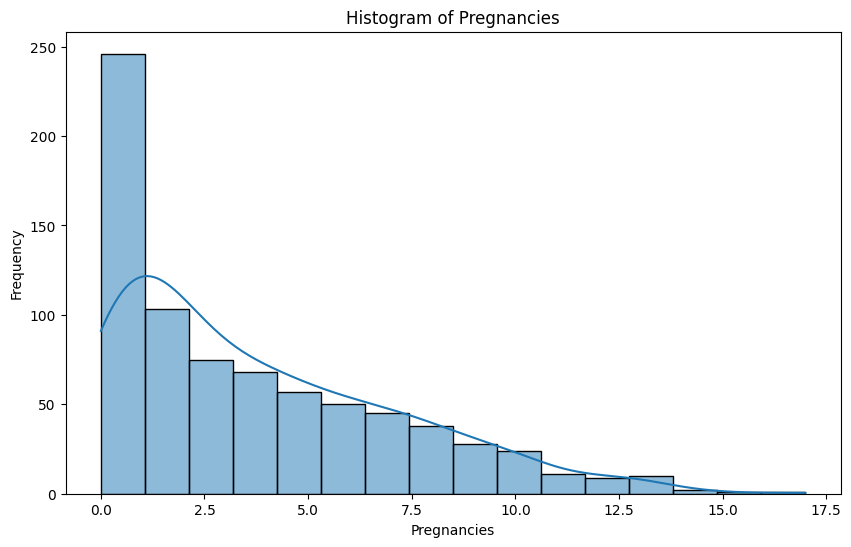

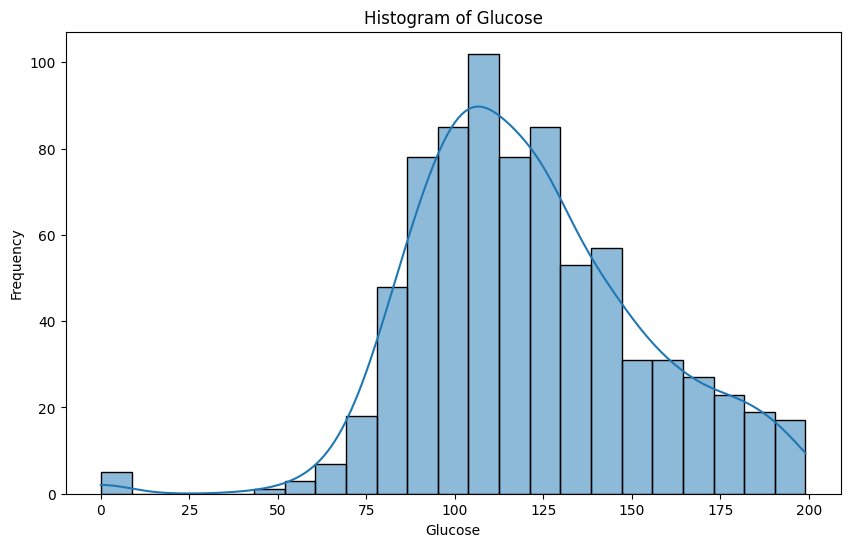

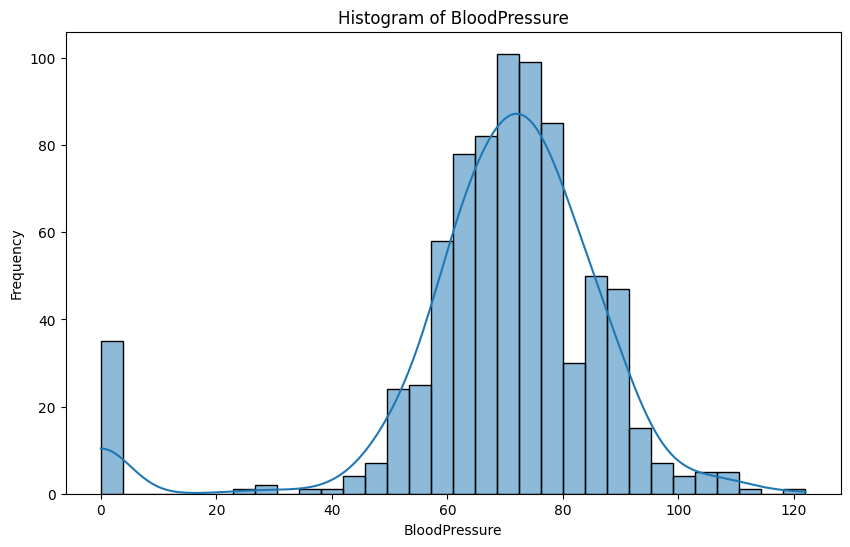

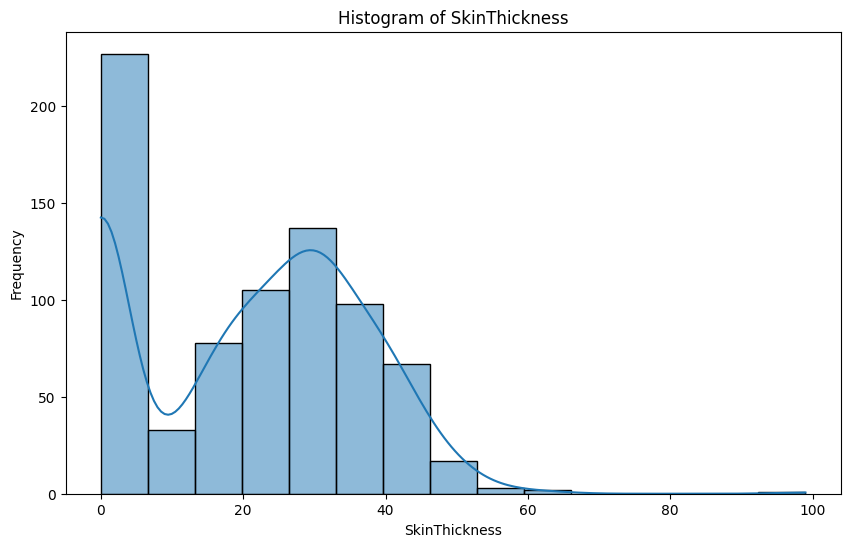

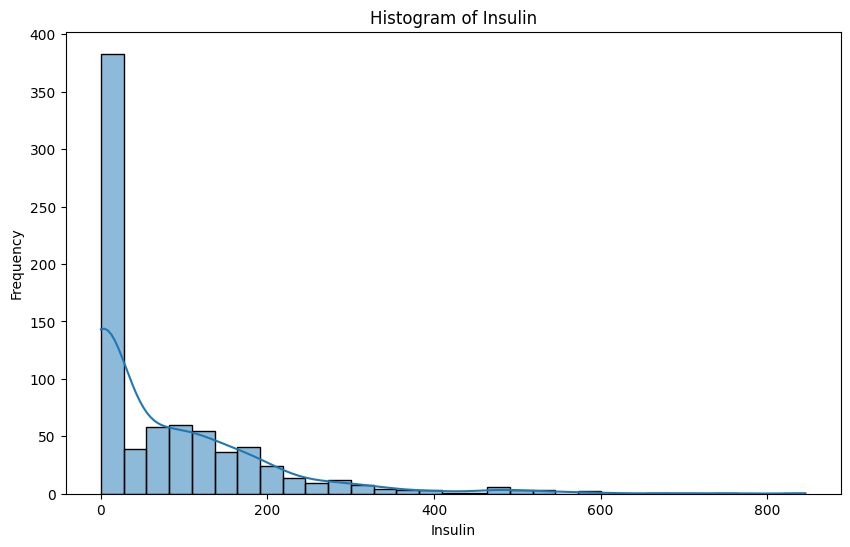

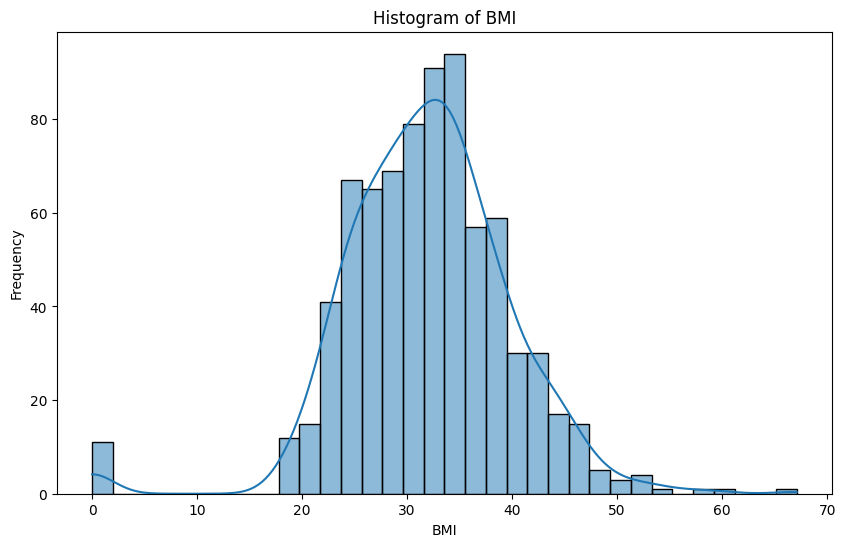

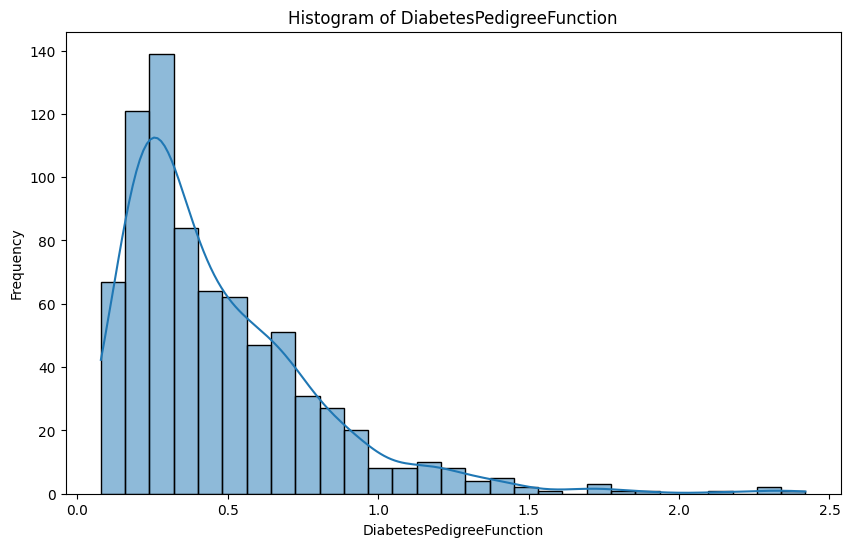

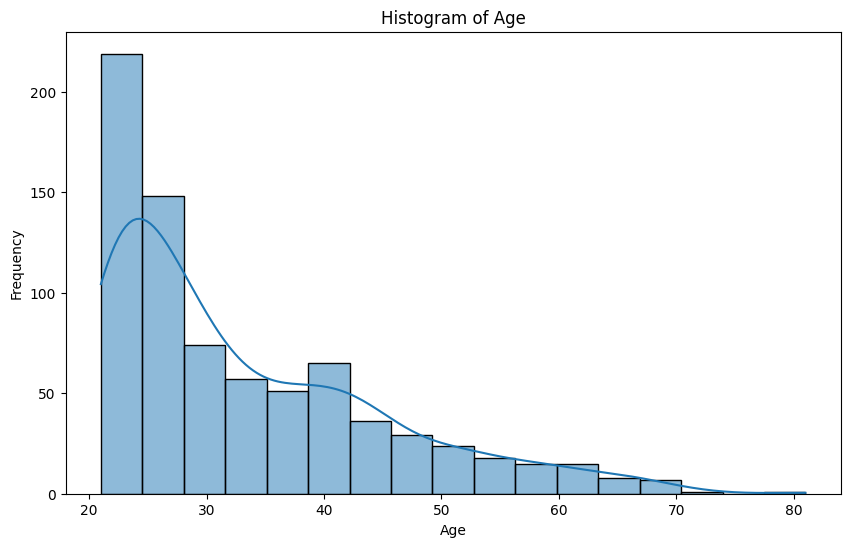

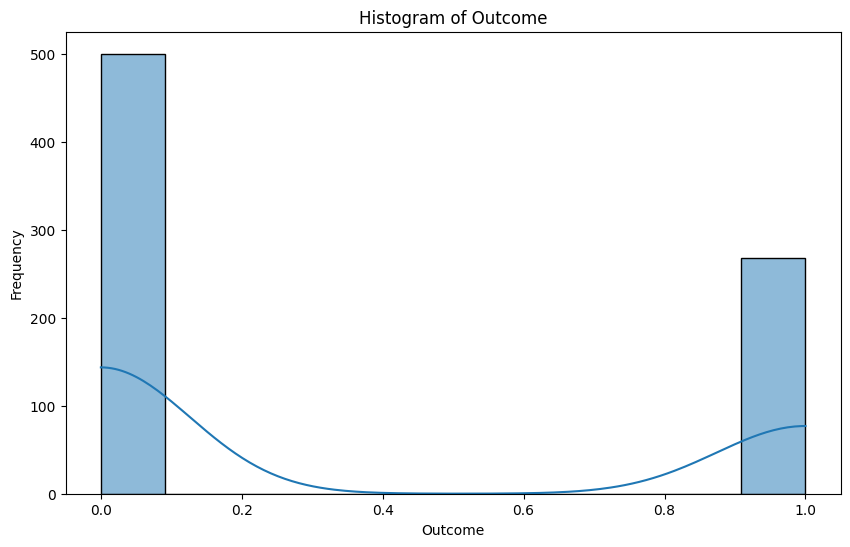

In [150]:
for column in diabetics.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(diabetics[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

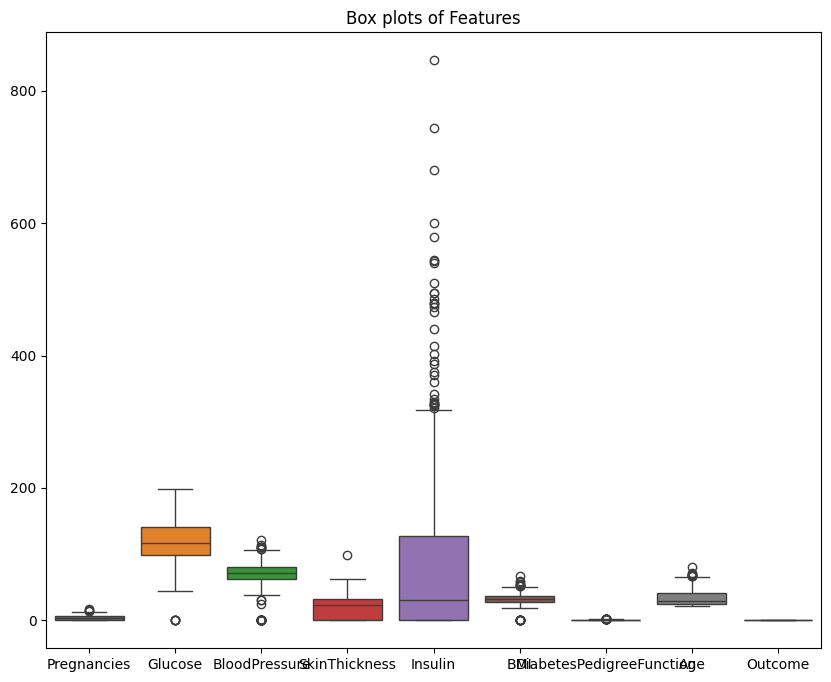

In [151]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=diabetics)
plt.title('Box plots of Features')
plt.show()

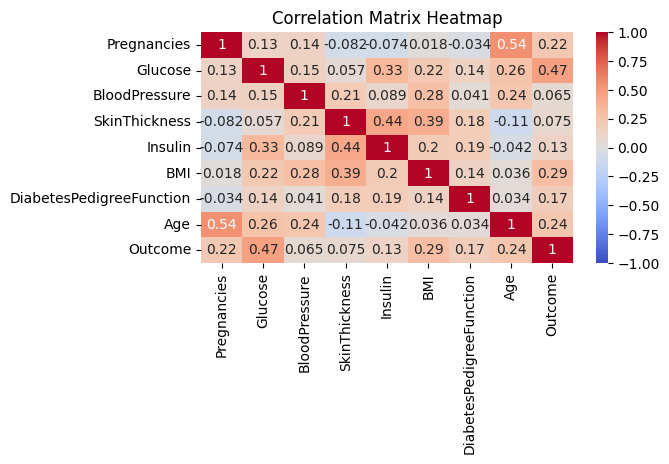

In [152]:
# Select numerical columns
numerical_columns = diabetics.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [160]:
diabetics['glucose_glucose'] = diabetics['Glucose']*diabetics['Glucose']*diabetics['Glucose']
diabetics['glucose_glucose_winsorized'] = winsorize(diabetics['glucose_glucose'], limits=[0.05, 0.05])
diabetics.drop(['glucose_glucose'], axis=1, inplace=True)

In [161]:
diabetics['pregnancies_winsorized'] = winsorize(diabetics['Pregnancies'], limits=[0.05, 0.05])
diabetics['glucose_winsorized'] = winsorize(diabetics['Glucose'], limits=[0.05, 0.05])
diabetics['blood_pressure_winsorized'] = winsorize(diabetics['BloodPressure'], limits=[0.05, 0.05])
diabetics['skin_thickness_winsorized'] = winsorize(diabetics['SkinThickness'], limits=[0.05, 0.05])
diabetics['insulin_winsorized'] = winsorize(diabetics['Insulin'], limits=[0.05, 0.05])
diabetics['bmi_winsorized'] = winsorize(diabetics['BMI'], limits=[0.05, 0.05])
diabetics['diabetics_pedigree_function_winsorized'] = winsorize(diabetics['DiabetesPedigreeFunction'], limits=[0.05, 0.05])
diabetics['age_winsorized'] = winsorize(diabetics['Age'], limits=[0.05, 0.05])
diabetics.drop(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age'], axis=1, inplace=True)

In [162]:
diabetics.head()

,Outcome,glucose_glucose_winsorized,pregnancies_winsorized,glucose_winsorized,blood_pressure_winsorized,skin_thickness_winsorized,insulin_winsorized,bmi_winsorized,diabetics_pedigree_function_winsorized,age_winsorized
0,1,3241792,6,148,72,35,0,33.6,0.627,50
1,0,614125,1,85,66,29,0,26.6,0.351,31
2,1,5929741,8,181,64,0,0,23.3,0.672,32
3,0,704969,1,89,66,23,94,28.1,0.167,21
4,1,2571353,0,137,40,35,168,43.1,1.136,33


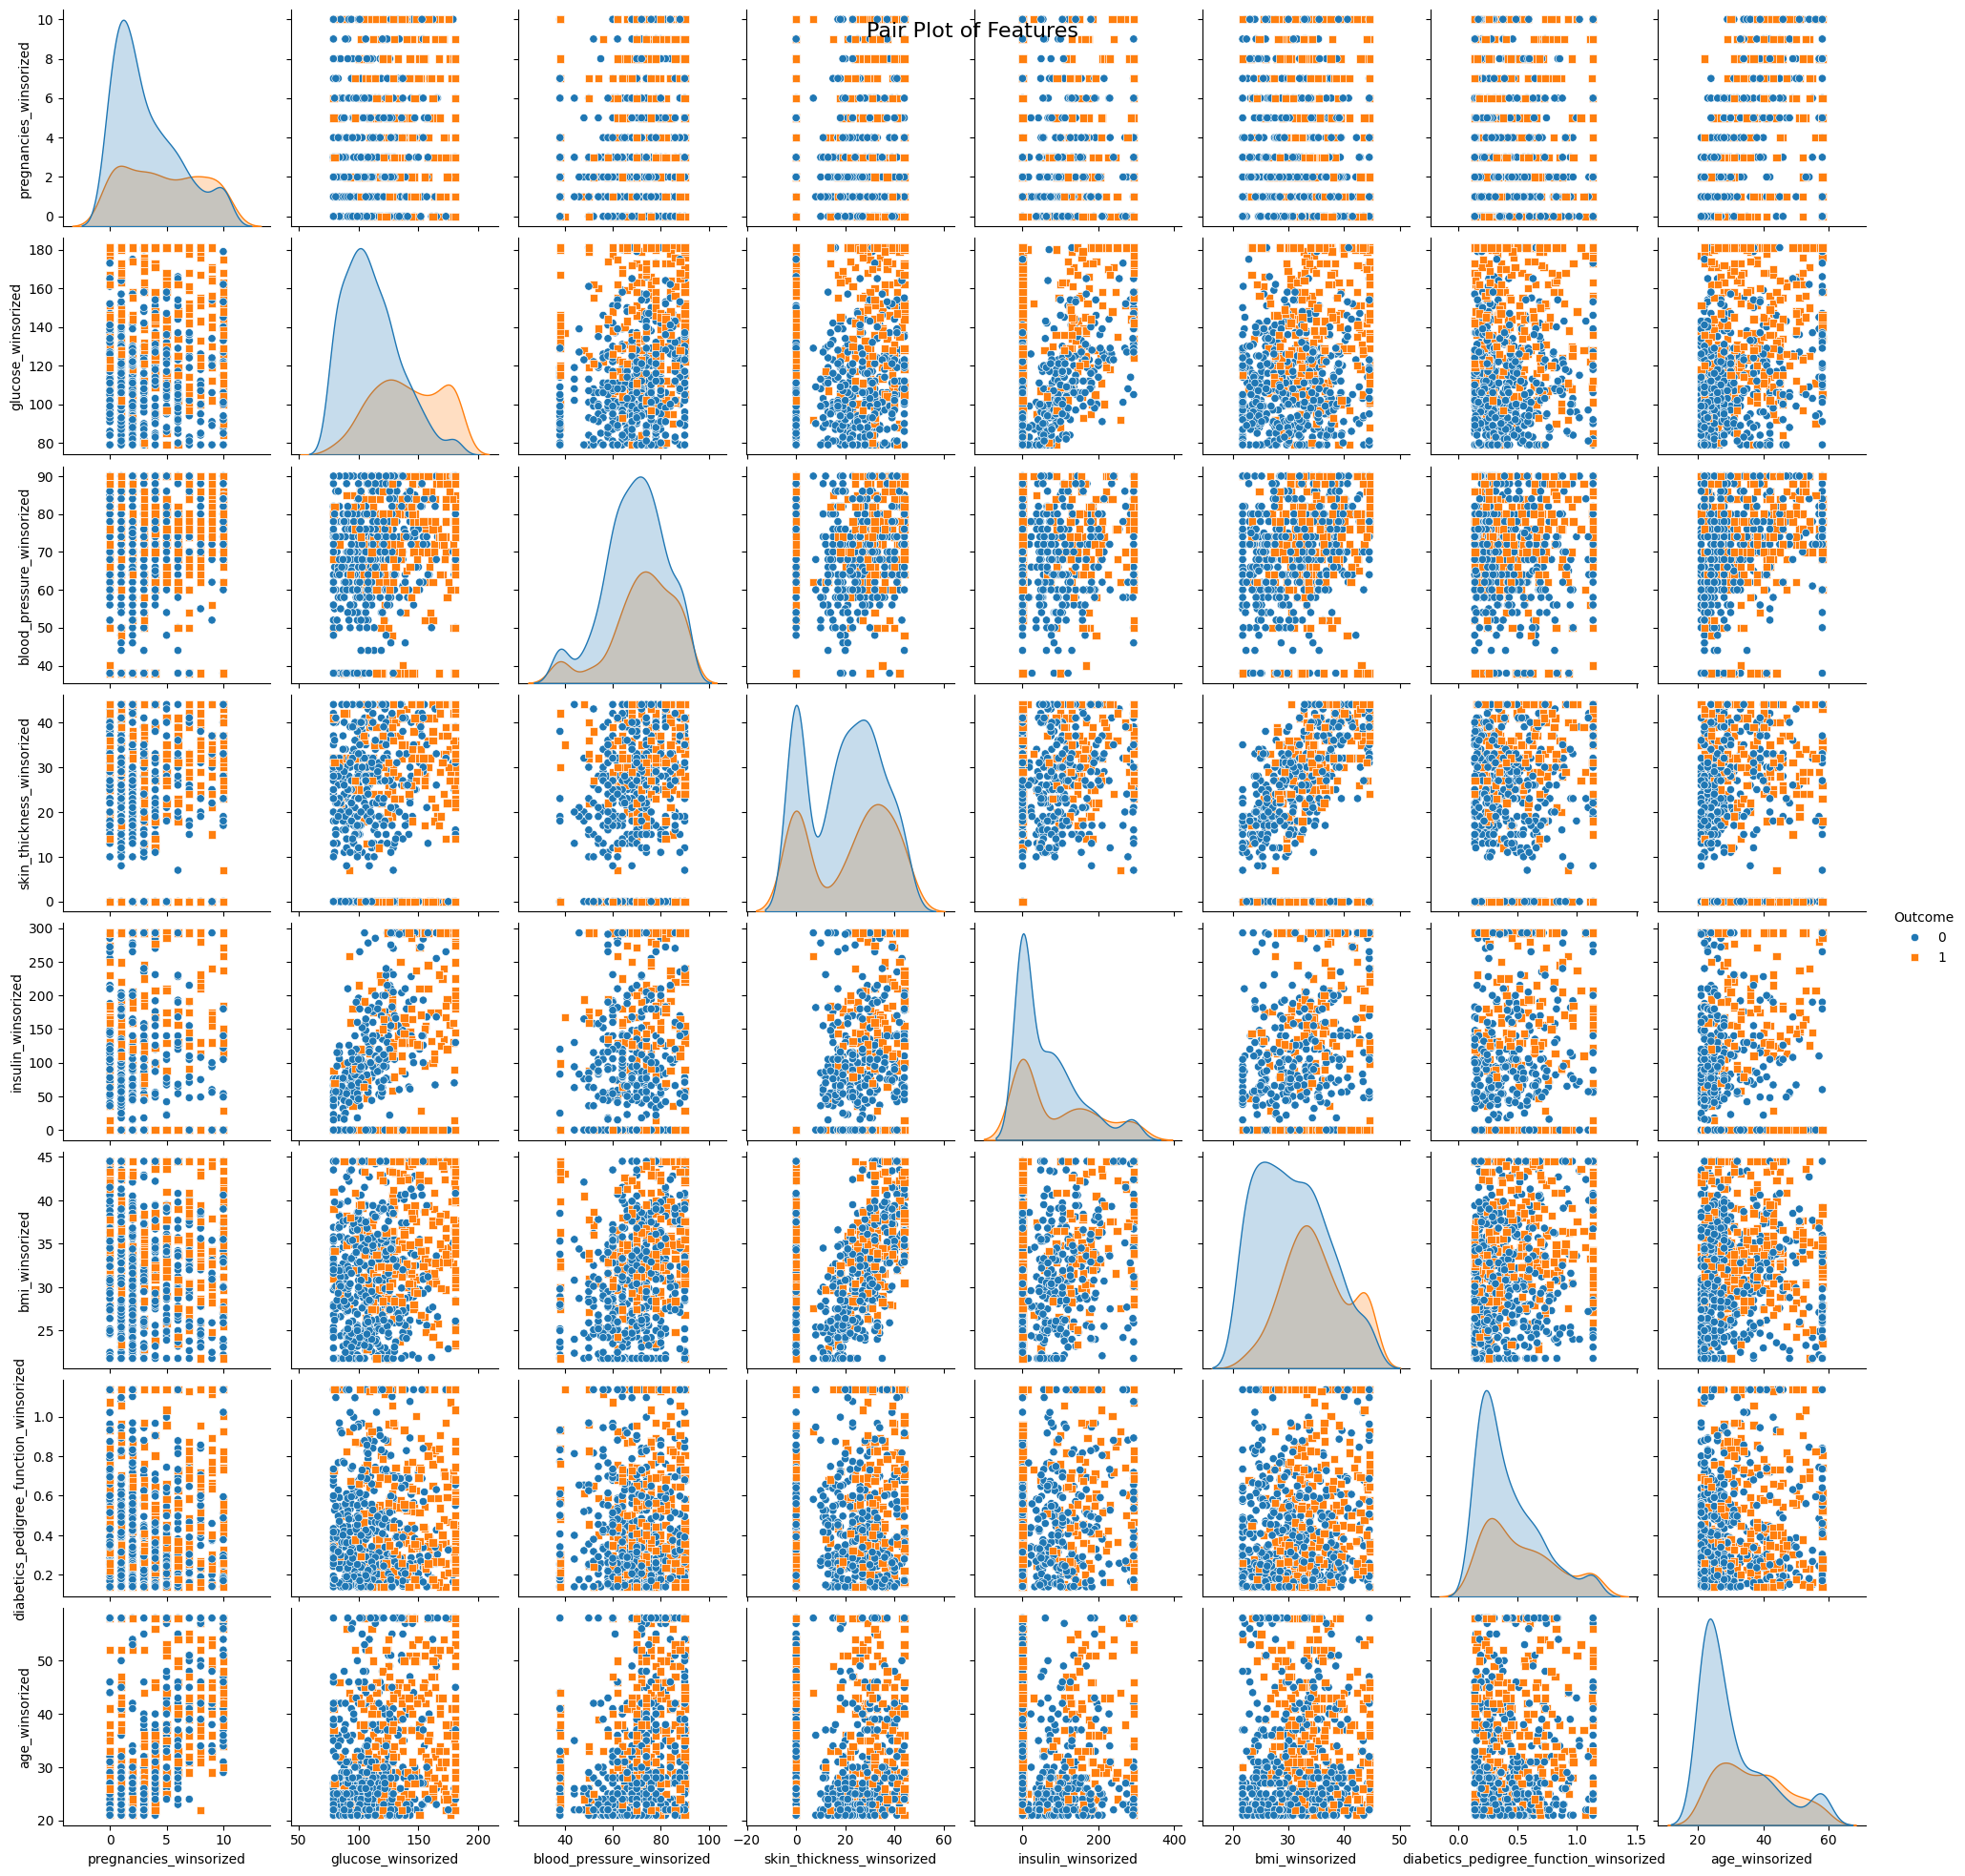

In [155]:
sns.pairplot(diabetics, hue='Outcome', markers=["o", "s"])
plt.suptitle('Pair Plot of Features', size=16)
plt.show()

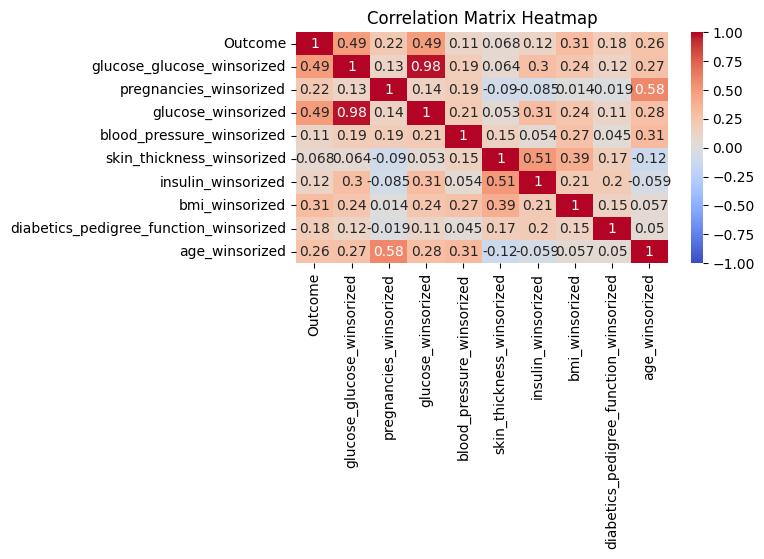

In [163]:
# Select numerical columns
numerical_columns = diabetics.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [164]:
X = diabetics.drop('Outcome', axis=1)
y=diabetics['Outcome']

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature importances:\n", feature_importances)

Feature importances:
 glucose_glucose_winsorized                0.171641
pregnancies_winsorized                    0.071933
glucose_winsorized                        0.184179
blood_pressure_winsorized                 0.079778
skin_thickness_winsorized                 0.055843
insulin_winsorized                        0.057484
bmi_winsorized                            0.154342
diabetics_pedigree_function_winsorized    0.109929
age_winsorized                            0.114871
dtype: float64


In [ ]:
# Select numerical columns
numeric_columns = diabetics.select_dtypes(include=['int64', 'float64']).columns

# Calculate Pearson's correlation coefficient for pairs of numerical features
for i, feature1 in enumerate(numeric_columns):
    for feature2 in numeric_columns[i + 1:]:
        corr_coefficient, p_value = pearsonr(diabetics[feature1], diabetics[feature2])
        print(f"Pearson's correlation coefficient between {feature1} and {feature2}: {corr_coefficient:.2f}")

Pearson's correlation coefficient between Outcome and pregnancies_winsorized: 0.22
Pearson's correlation coefficient between Outcome and glucose_winsorized: 0.49
Pearson's correlation coefficient between Outcome and blood_pressure_winsorized: 0.11
Pearson's correlation coefficient between Outcome and skin_thickness_winsorized: 0.07
Pearson's correlation coefficient between Outcome and insulin_winsorized: 0.12
Pearson's correlation coefficient between Outcome and bmi_winsorized: 0.31
Pearson's correlation coefficient between Outcome and diabetics_pedigree_function_winsorized: 0.18
Pearson's correlation coefficient between Outcome and age_winsorized: 0.26
Pearson's correlation coefficient between pregnancies_winsorized and glucose_winsorized: 0.14
Pearson's correlation coefficient between pregnancies_winsorized and blood_pressure_winsorized: 0.19
Pearson's correlation coefficient between pregnancies_winsorized and skin_thickness_winsorized: -0.09
Pearson's correlation coefficient between

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.185, random_state=42)

In [213]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(625, 9) (143, 9) (625,) (143,)


In [214]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [215]:
# Train the logistic regression model
model = LogisticRegression(random_state=42)

In [216]:
# Define parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 0.0001],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500,800, 1000, 2000, 1500, 300]
}
# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=8, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Evaluate on test set with best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best Parameters: {'C': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Best CV Accuracy: 0.776067023693606


In [219]:
# Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification report", classification_report)
print("Matthews Correlation Coefficient:", mcc)

Confusion Matrix:
 [[76 15]
 [17 35]]
Precision: 0.7
Recall: 0.6730769230769231
F1-score: 0.6862745098039216
Classification report               precision    recall  f1-score   support

           0       0.82      0.84      0.83        91
           1       0.70      0.67      0.69        52

    accuracy                           0.78       143
   macro avg       0.76      0.75      0.76       143
weighted avg       0.77      0.78      0.78       143

Matthews Correlation Coefficient: 0.5127034458131663


**Confusion matrix:**

**True Positives (TP):** 35 instances were correctly predicted as positive (class 1).

**True Negatives (TN):** 76 instances were correctly predicted as negative (class 0).

**False Positives (FP):** 15 instances were incorrectly predicted as positive (predicted class 1, but actually class 0).

**False Negatives (FN):** 17 instances were incorrectly predicted as negative (predicted class 0, but actually class 1).

**Precision:**

Precision measures the proportion of positive predictions that were correct.

Precision = TP / (TP + FP) = 35 / (35 + 15) = 0.7

This means that when the model predicts a positive outcome, it is correct 70% of the time.

**recall:**

Recall (or sensitivity) measures the proportion of actual positives that were correctly identified by the model.

Recall = TP / (TP + FN) = 35 / (35 + 17) = 0.673

This means that the model correctly identifies 67.3% of all actual positive instances.

**F1-score:**

F1-score is the harmonic mean of precision and recall, providing a balanced measure between the two.

F1-score = 2 * (Precision * Recall) / (Precision + Recall)

F1-score = 2 * (0.7 * 0.673) / (0.7 + 0.673) = 0.686

The F1-score considers both precision and recall, providing a single metric to evaluate the model's performance on the 
positive class.

**Accuracy:**

Accuracy measures the proportion of correct predictions (both true positives and true negatives) out of all predictions.

Accuracy = (TP + TN) / (TP + TN + FP + FN) = (76 + 35) / 143 = 0.78 or 78%

The model achieves an overall accuracy of 78%, which indicates the percentage of correct predictions across all classes.

**Matthews Correlation Coefficient (MCC):**

MCC takes into account true and false positives and negatives, providing a balanced measure that is especially useful for imbalanced datasets.

MCC = 0.513

MCC ranges from -1 to +1, where +1 indicates perfect prediction, 0 indicates random prediction, and -1 indicates total disagreement between prediction and observation.

**Classification Report:**

The classification report provides precision, recall, F1-score, and support (number of instances) for each class (0 and 1).
It summarizes the performance of the model across different metrics for each class and overall (weighted average).

**Interpretation:**

The confusion matrix and metrics indicate that the model performs reasonably well:

It correctly predicts negative outcomes (class 0) more often than positive outcomes (class 1), as evidenced by higher precision, recall, and F1-score for class 0 compared to class 1.

The overall accuracy of 78% suggests that the model correctly predicts the outcome in 78% of cases.

The MCC of 0.513 indicates moderate agreement between predicted and observed classes.

Precision, recall, and F1-score provide insights into the model's ability to correctly identify positive cases (diabetes) while minimizing false positives and false negatives.

In [222]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(best_model, open('best_model.pkl', 'wb'))